In [1]:
%matplotlib widget
from easydynamics.Analysis import Analysis

import numpy as np

from easydynamics.sample import GaussianComponent
from easydynamics.sample import LorentzianComponent
from easydynamics.sample import PolynomialComponent
from easydynamics.sample import SampleModel
from easydynamics.sample import DeltaFunctionComponent

from easydynamics.Experiment import Experiment

import matplotlib.pyplot as plt


from easydynamics.Job import Job
from easydynamics.Experiment import Data


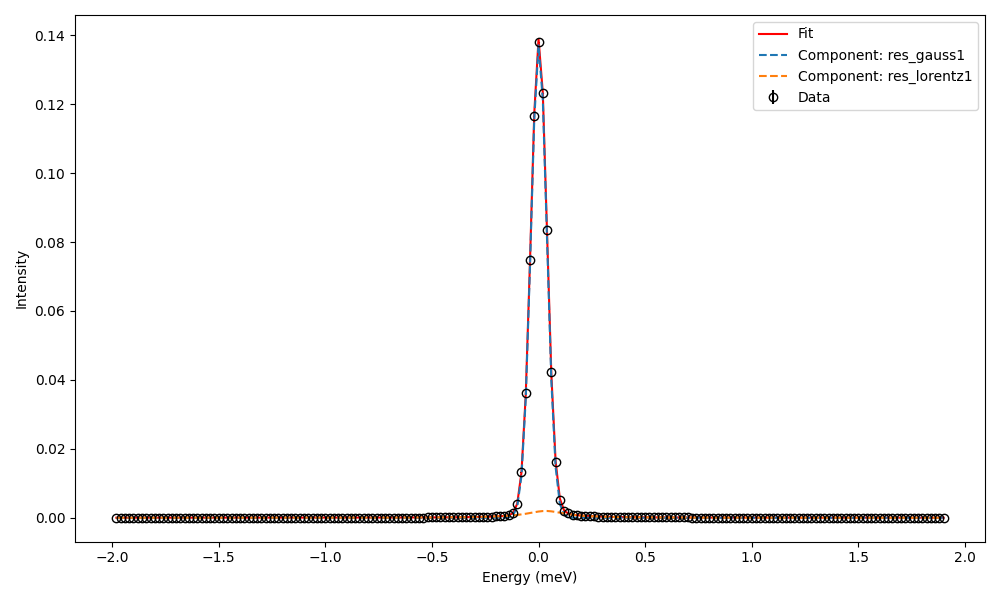

(0.0, 0.005)

In [2]:
# Find the resolution at low temperature for the BVC samplex
BVC_resolution= Job(name='BVC sample')

theory= SampleModel('Resolution Model')
theory.add_component(GaussianComponent(width=0.1,area=3e-3,name='res_gauss1'))
theory.add_component(LorentzianComponent(width=0.1, center=0.05,area=1e-4,name='res_lorentz1'))

BVC_resolution.set_theory(theory)

experiment=Experiment('BVC low T')

background=SampleModel('BVC Background')
background.add_component(PolynomialComponent(coefficients=[1e-4]))

experiment.set_background_model(background)

experiment.set_resolution_model(None)

data=Data('BVC low T data')
data.append(data.load_example_anesthetics_data_lowT())
# data.append(data.load_example_anesthetics_data_highT())

experiment.set_data(data)

BVC_resolution.set_experiment(experiment)


analysis=Analysis('BVC Resolution')

BVC_resolution.set_analysis(analysis)

BVC_resolution.fit()
fig=BVC_resolution.analysis.plot_data_and_model(plot_individual_components=True)

fig.axes[0].set_xlim(-1, 1)
fig.axes[0].set_ylim(0, 5e-3)

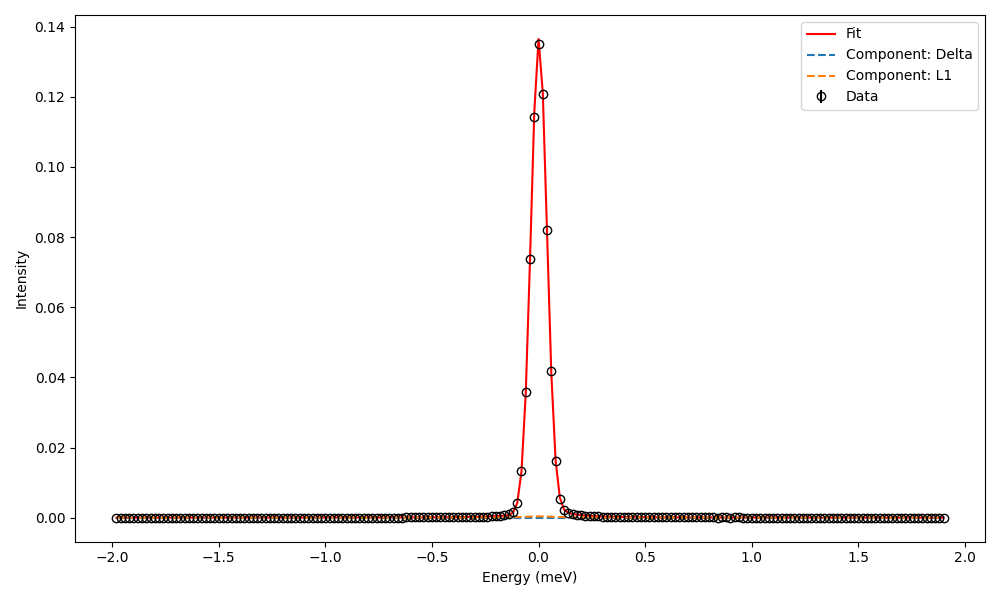

(0.0, 0.005)

In [3]:
# Now fit the BVC sample at higher temperature
BVC_midT= Job(name='BVC sample mid T')

theory= SampleModel('Mid T model')
theory.add_component(DeltaFunctionComponent(area=1,name='Delta'))
theory.add_component(LorentzianComponent(width=0.15,area=7e-4,name='L1'))

BVC_midT.set_theory(theory)

experiment=Experiment('BVC mid T')

background=SampleModel('BVC Background')
background.add_component(PolynomialComponent(coefficients=[1e-4]))

experiment.set_background_model(background)

# Set and fix the resolution model
resolution=BVC_resolution._theory
res_pars=resolution.get_parameters()
for par in res_pars:
    par.fixed=True

experiment.set_resolution_model(resolution)

data=Data('BVC mid T data')
data.append(data.load_example_anesthetics_data_midT())

experiment.set_data(data)

BVC_midT.set_experiment(experiment)


analysis=Analysis('BVC Resolution')

BVC_midT.set_analysis(analysis)

BVC_midT.fit()
fig=BVC_midT.analysis.plot_data_and_model(plot_individual_components=True)

fig.axes[0].set_xlim(-1, 1)
fig.axes[0].set_ylim(0, 5e-3)

In [4]:
BVC_midT.get_fit_parameters()

[<Parameter 'Deltaarea': 0.0132 ± 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'L1area': 0.0001 ± 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'L1width': 0.1079 ± 0.0184 meV, bounds=[0.0:inf]>,
 <Parameter 'Polynomial_c0': 0.0000 ± 0.0000 meV, bounds=[-inf:inf]>,
 <Parameter 'offset': 0.0015 ± 0.0001 meV, bounds=[-inf:inf]>]

In [10]:
# Now fit the BVC sample at higher temperature
BVC_highT= Job(name='BVC sample high T')

theory= SampleModel('high T model')
theory.add_component(DeltaFunctionComponent(area=0.01,name='Delta'))
theory.add_component(LorentzianComponent(width=0.15,area=2e-3,name='L1'))

theory.temperature(300,'K')

BVC_highT.set_theory(theory)

experiment=Experiment('BVC high T')

background=SampleModel('BVC Background')
background.add_component(PolynomialComponent(coefficients=[1e-4]))

experiment.set_background_model(background)

# Set and fix the resolution model
resolution=BVC_resolution._theory
res_pars=resolution.get_parameters()
for par in res_pars:
    par.fixed=True

experiment.set_resolution_model(resolution)

data=Data('BVC high T data')
data.append(data.load_example_anesthetics_data_highT())

experiment.set_data(data)

BVC_highT.set_experiment(experiment)


analysis=Analysis('BVC Resolution')

BVC_highT.set_analysis(analysis)


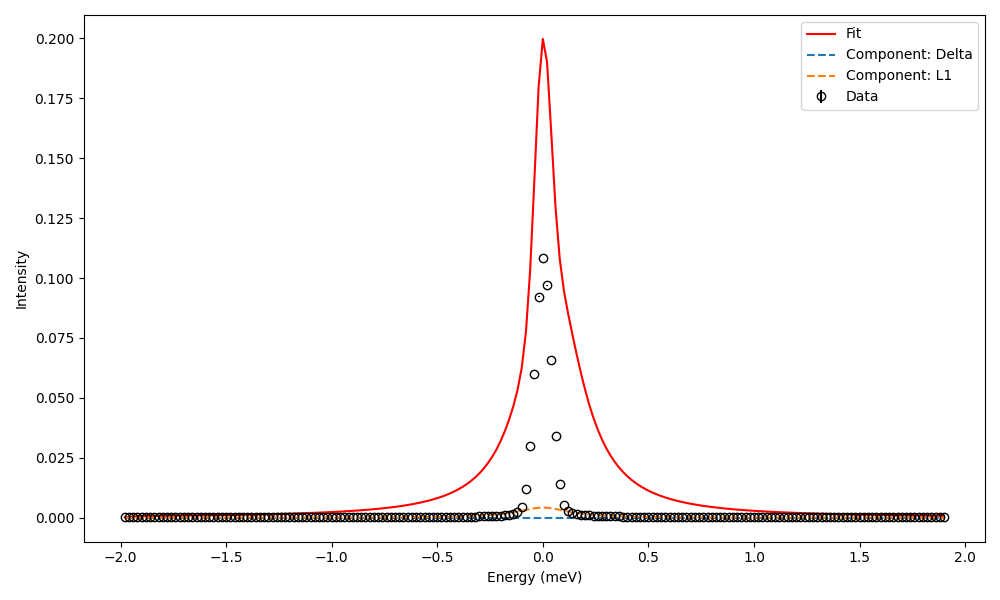

In [11]:
fig=BVC_highT.analysis.plot_data_and_model(plot_individual_components=True)


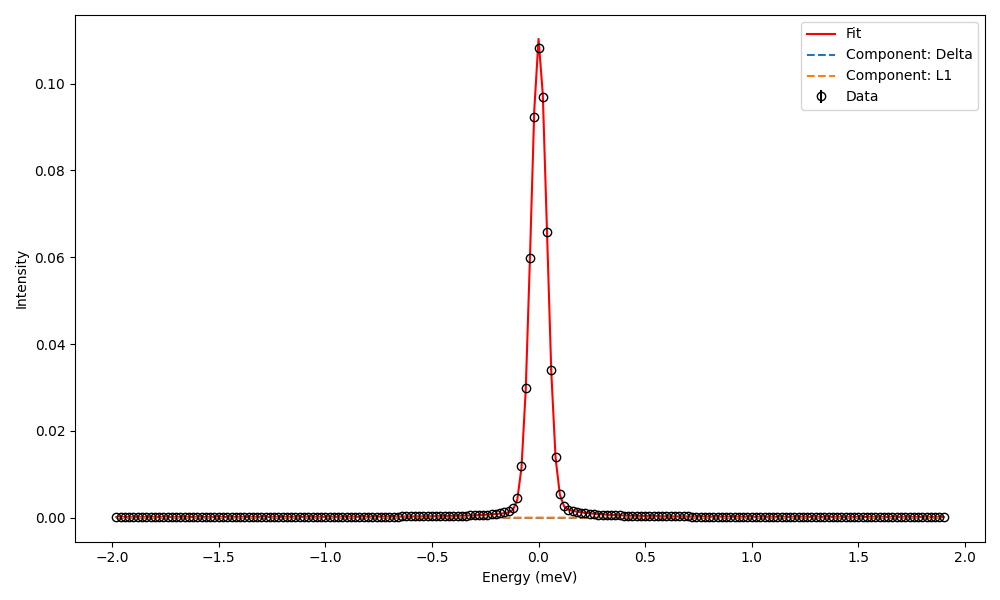

In [12]:

BVC_highT.fit()
fig=BVC_highT.analysis.plot_data_and_model(plot_individual_components=True)

# fig.axes[0].set_xlim(-1, 1)
# fig.axes[0].set_ylim(0, 5e-3)

In [13]:
BVC_highT.get_fit_parameters()

[<Parameter 'Deltaarea': 0.0106 ± 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'L1area': 0.0000 ± 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'L1width': 0.1993 ± 0.0099 meV, bounds=[0.0:inf]>,
 <Parameter 'Polynomial_c0': 0.0002 ± 0.0000 meV, bounds=[-inf:inf]>,
 <Parameter 'offset': 0.0012 ± 0.0001 meV, bounds=[-inf:inf]>]